In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go


In [53]:
df=pd.read_csv('data_1024.csv', sep='\t')
df.head()




,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


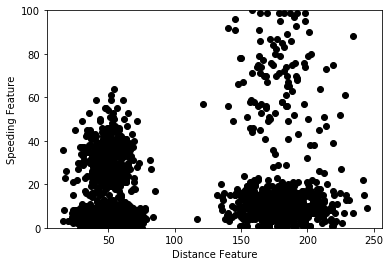

In [54]:
plt.figure()
plt.plot(df.Distance_Feature, df.Speeding_Feature, 'ko')
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.ylim(0,100)
plt.show()

In [65]:
feat1 = df['Distance_Feature'].values
feat2 = df['Speeding_Feature'].values

X = np.matrix(list(zip(feat1,feat2)))
kmeans = KMeans(n_clusters = 2).fit(X)

kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

50.047634375 8.82875
180.017075 18.29


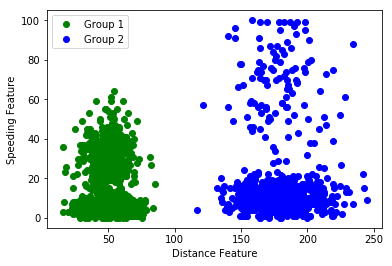

In [56]:
# Plot the results
plt.figure()
h1,=plt.plot(feat1[kmeans.labels_==0],feat2[kmeans.labels_==0],'go')
plt.plot(np.mean(feat1[kmeans.labels_==0]),np.mean(feat2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
# print centroid 1
print(np.mean(feat1[kmeans.labels_==0]),np.mean(feat2[kmeans.labels_==0]))
h2,=plt.plot(feat1[kmeans.labels_==1],feat2[kmeans.labels_==1],'bo')
plt.plot(np.mean(feat1[kmeans.labels_==1]),np.mean(feat2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
# print centroid 2
print(np.mean(feat1[kmeans.labels_==1]),np.mean(feat2[kmeans.labels_==1]))
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')

plt.legend([h1,h2],['Group 1','Group 2'], loc='upper left')
plt.show()

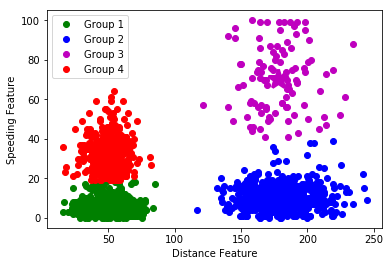

In [57]:
kmeans = KMeans(n_clusters=4).fit(np.matrix(list(zip(feat1,feat2))))

# Plot the results
plt.figure()
h1,=plt.plot(feat1[kmeans.labels_==0],feat2[kmeans.labels_==0],'go')
plt.plot(np.mean(feat1[kmeans.labels_==0]),np.mean(feat2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
h2,=plt.plot(feat1[kmeans.labels_==1],feat2[kmeans.labels_==1],'bo')
plt.plot(np.mean(feat1[kmeans.labels_==1]),np.mean(feat2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
h3,=plt.plot(feat1[kmeans.labels_==2],feat2[kmeans.labels_==2],'mo')
plt.plot(np.mean(feat1[kmeans.labels_==2]),np.mean(feat2[kmeans.labels_==2]),'m*',markersize=20,mew=3)
h4,=plt.plot(feat1[kmeans.labels_==3],feat2[kmeans.labels_==3],'ro')
plt.plot(np.mean(feat1[kmeans.labels_==3]),np.mean(feat2[kmeans.labels_==3]),'r*',markersize=20,mew=3)
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=4).fit(np.matrix(list(zip(feat1,feat2))))

py.offline.init_notebook_mode(connected=True)

labels = set(kmeans.labels_)

traces = []

for n in labels:
    traces.append(go.Scatter(
                    x = feat1[kmeans.labels_ == n],
                    y = feat2[kmeans.labels_ == n],
                    mode = 'markers',
                    name = 'Group %s' % (n+1)
                    )
                 )

py.offline.iplot(traces, filename='basic-scatter')
